In [9]:
#Default
import pandas as pd
import numpy as np 
import IPython
from scipy.io import wavfile
import matplotlib.pyplot as plt
import librosa
import librosa.display
from playsound import playsound

In [13]:
audio = "interrupted_1.wav"
sample_rate, samples = wavfile.read(audio)
#frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)
samples, sample_rate = librosa.load(audio, sr=16000)

In [5]:
IPython.display.Audio(audio)

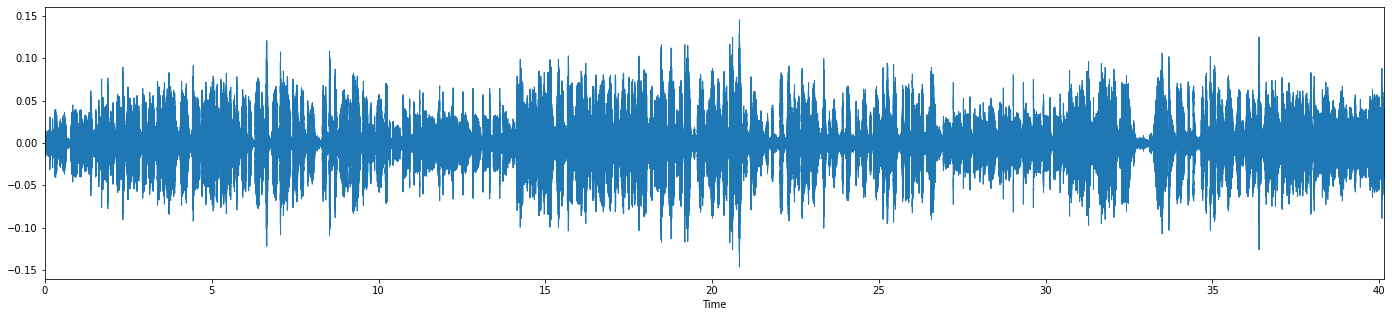

In [14]:
# amplitude envelope of wav file 
plt.figure(figsize=(24, 5))
librosa.display.waveplot(samples, sr=sample_rate)

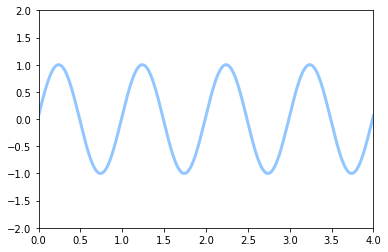

In [88]:

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
plt.style.use('seaborn-pastel')


fig = plt.figure()
ax = plt.axes(xlim=(0, 4), ylim=(-2, 2))
line, = ax.plot([], [], lw=3)

def init():
    line.set_data([], [])
    return line,

def animate(i):
    x = np.linspace(0, 4, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

anim = FuncAnimation(fig, animate, 
                               frames=200, interval=20, blit=True)


anim.save('sine_wave.gif', writer='pillow')

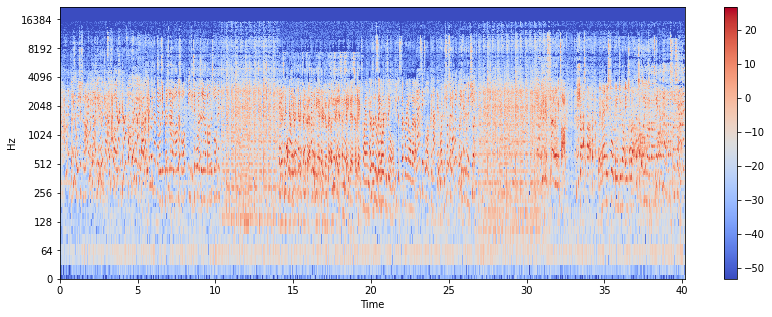

In [30]:
#display Spectrogram
X = librosa.stft(samples)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
# librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='hz') 
#If to pring log of frequencies  
librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='log')
plt.colorbar()

(20, 3459)


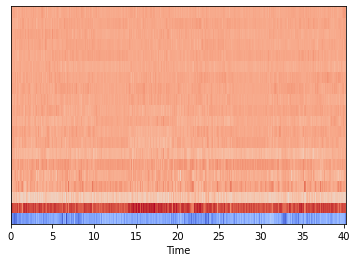

In [32]:
mfccs = librosa.feature.mfcc(samples, sr=sample_rate)
print(mfccs.shape)
#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time')

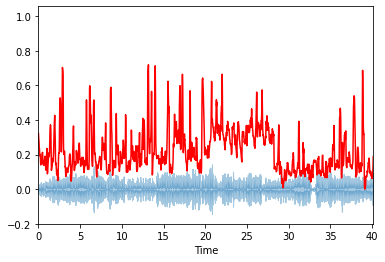

In [36]:
#spectral centroid -- centre of mass -- weighted mean of the frequencies present in the sound
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(samples, sr=sample_rate)[0]
spectral_centroids.shape
# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(samples, axis=0):
    return sklearn.preprocessing.minmax_scale(samples, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(samples, sr=sample_rate, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

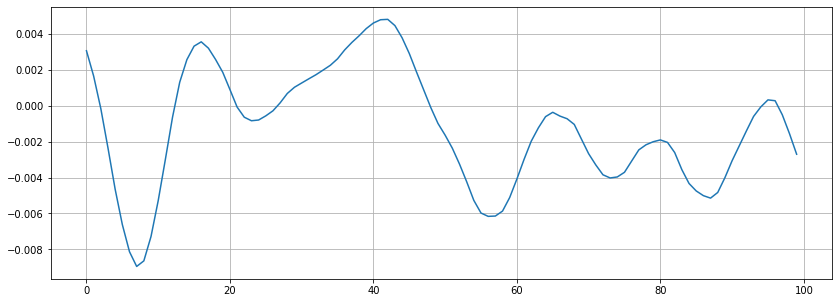

In [37]:
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(samples[n0:n1])
plt.grid()